# Models
- SVM
- ARIMA model (NN)
- LSTM
- Multivariate LSTM (link on slack)
- Multistep LSTM (link sent in slack)
- GRU model (Gated Recurrent Unit)
- Attention Mechanism
- Vanilla LSTM

- Ananya's research papers also included Deep GPR (Gaussian Process Regression)

In [1]:
import datetime

def log_output_to_file(output_text, log_file_path):
    timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    divider = '-' * 50  # Line divider
    
    with open(log_file_path, 'a') as log_file:
        log_file.write(f'{timestamp}\n')
        log_file.write(divider + '\n')
        log_file.write(output_text)
        log_file.write('\n\n')

log_file_path = 'other_models.txt'

#### Imports

In [2]:
import pandas as pd

In [3]:
x = pd.read_csv('train-tests/x.csv')
y = pd.read_csv('train-tests/y.csv')

In [4]:
print(x.shape, y.shape)

(1108, 28) (1108, 1)


#### SVM

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
x_svm = sc_X.fit_transform(x)
y_svm = sc_y.fit_transform(y)

In [6]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_svm, y_svm, test_size=0.25)

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)

regressor2 = SVR(kernel='linear')
regressor2.fit(x_train, y_train)

regressor3 = SVR(kernel='poly')
regressor3.fit(x_train, y_train)

regressor4 = SVR(kernel='sigmoid')
regressor4.fit(x_train, y_train)

c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d arr

SVR(kernel='sigmoid')

In [8]:
print(x_test.shape, y_test.shape)

(277, 28) (277, 1)


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = regressor.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.69
Mean Squared Error (MSE): 0.77
Root Mean Squared Error (RMSE): 0.88
R-squared (R2) Score: 0.07


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = regressor2.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.72
Mean Squared Error (MSE): 1.32
Root Mean Squared Error (RMSE): 1.15
R-squared (R2) Score: -0.61


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = regressor3.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.79
Mean Squared Error (MSE): 1.90
Root Mean Squared Error (RMSE): 1.38
R-squared (R2) Score: -1.31


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
y_pred = regressor3.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.79
Mean Squared Error (MSE): 1.90
Root Mean Squared Error (RMSE): 1.38
R-squared (R2) Score: -1.31


-----------------------------

#### ARIMA

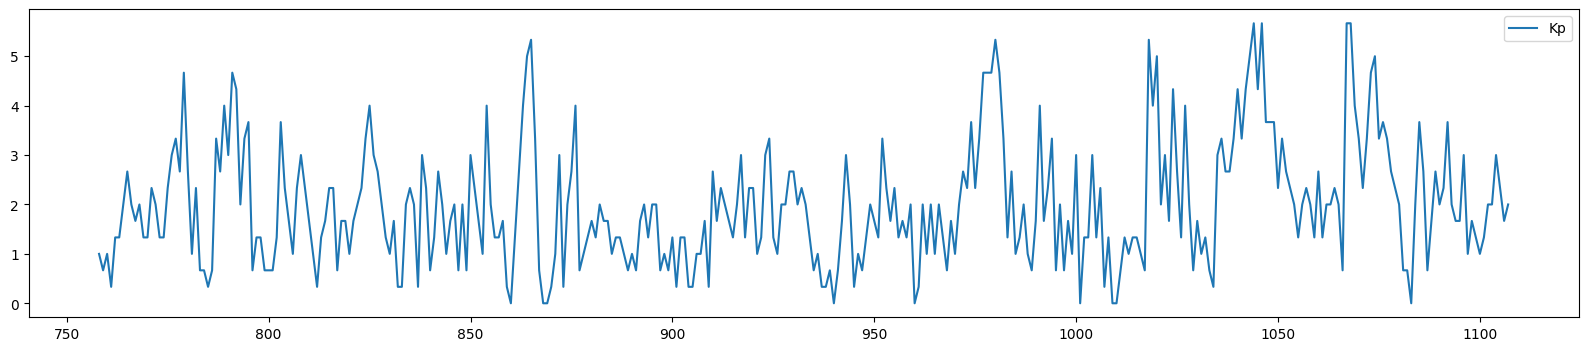

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

config = (5,1,1)
train_size = 0.66

df = pd.read_csv('../Datasets/Merged_Dataset.csv')
df.iloc[-350:, :].plot(y='Kp', legend=True, figsize=(20,4))
plt.show()

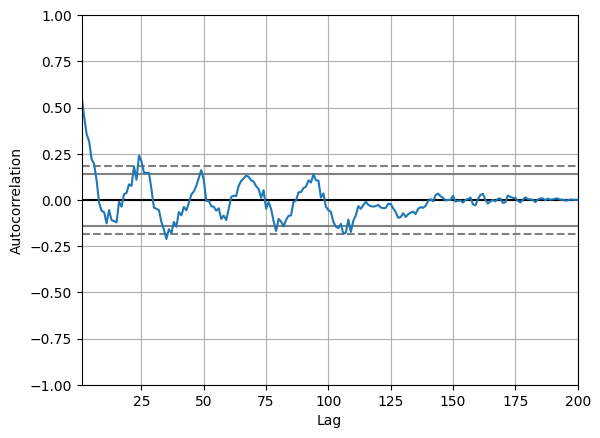

In [57]:
# Autocorrelation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.iloc[-200:, :]['Kp'])
# plt.figure(20,4)
plt.show()

In [58]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df['Kp'], order=config)
arima_fit = arima.fit()
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     Kp   No. Observations:                 1108
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1609.622
Date:                Sat, 07 Oct 2023   AIC                           3233.245
Time:                        18:22:16   BIC                           3268.311
Sample:                             0   HQIC                          3246.506
                               - 1108                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5010      0.026     19.291      0.000       0.450       0.552
ar.L2          0.1061      0.031      3.456      0.001       0.046       0.166
ar.L3          0.0352      0.035      1.016      0.3

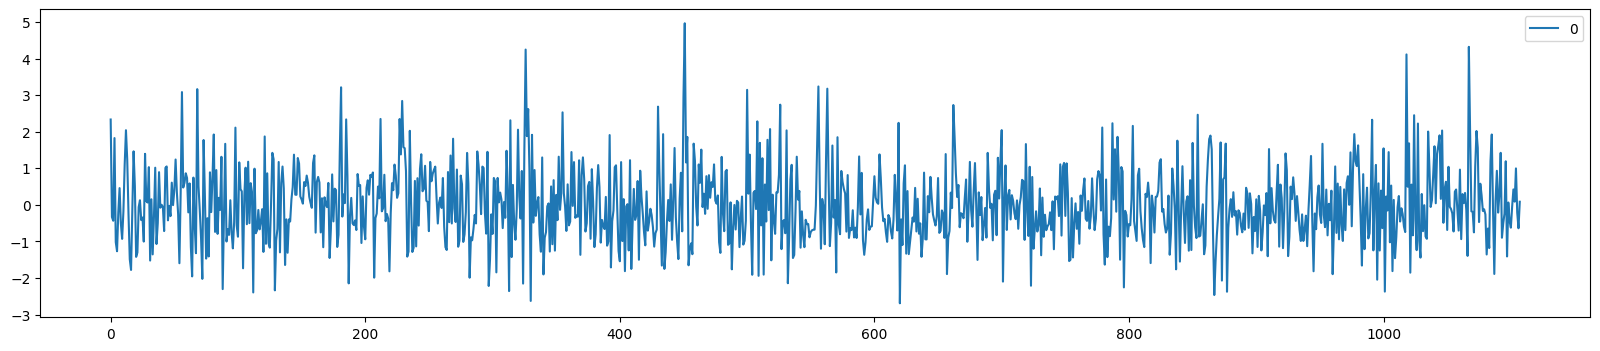

In [59]:
residuals = pd.DataFrame(arima_fit.resid)
residuals.plot(figsize=(20,4))
plt.show()

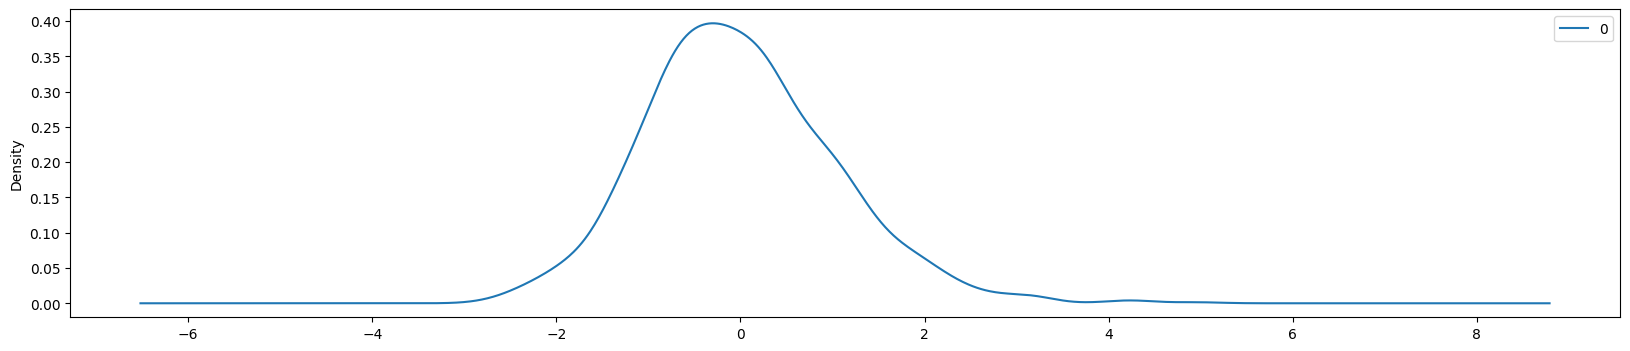

In [60]:
residuals.plot(kind='kde', figsize=(20,4))
plt.show()

In [61]:
print(residuals.describe())

                 0
count  1108.000000
mean     -0.003383
std       1.037995
min      -2.691358
25%      -0.705973
50%      -0.098265
75%       0.612000
max       4.963916


Mean almost zero, this implies that there is almost no bias in prediction

In [62]:
X = df['Kp'].values
size = int(len(X) * train_size)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []
counter = 0
for t in range(len(test)):
    arima = ARIMA(history, order=config)
    fit = arima.fit()
    output = fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    counter += 1
    print(f"{counter}: Predicted={yhat}, Expected={obs}")


1: Predicted=1.7057682776421683, Expected=0.333
2: Predicted=1.1241110573892261, Expected=1.333
3: Predicted=1.5359498464609742, Expected=0.667
4: Predicted=1.2258157341680855, Expected=1.0
5: Predicted=1.397903423068175, Expected=0.667
6: Predicted=1.2058206863042342, Expected=0.667
7: Predicted=1.2021348545791213, Expected=0.667
8: Predicted=1.1756384304212568, Expected=1.0
9: Predicted=1.3540652788871563, Expected=0.667
10: Predicted=1.203759298746324, Expected=1.333
11: Predicted=1.5239283968513695, Expected=0.333
12: Predicted=1.0442277130655166, Expected=1.333
13: Predicted=1.4887250099488987, Expected=1.667
14: Predicted=1.7168715715878138, Expected=2.0
15: Predicted=1.9821030436372464, Expected=1.667
16: Predicted=1.8217729630431654, Expected=3.0
17: Predicted=2.4977568292092283, Expected=1.667
18: Predicted=1.9257977269962856, Expected=3.0
19: Predicted=2.5307727659102635, Expected=3.667
20: Predicted=2.9449827211147124, Expected=2.667
21: Predicted=2.5796363086325256, Expecte

c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\hifia\anaconda3\envs\SpaceApps\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


172: Predicted=1.0274613307094305, Expected=1.333
173: Predicted=1.4729288630087247, Expected=1.333
174: Predicted=1.5221404066183488, Expected=0.333
175: Predicted=1.034243431676154, Expected=0.333
176: Predicted=0.9544779244240522, Expected=1.0
177: Predicted=1.22567457014437, Expected=1.0
178: Predicted=1.2999423576609117, Expected=1.667
179: Predicted=1.702699575858293, Expected=0.333
180: Predicted=1.0534067909472504, Expected=2.667
181: Predicted=2.1420505532713197, Expected=1.667
182: Predicted=1.7789324887532292, Expected=2.333
183: Predicted=2.1140096278079494, Expected=2.0
184: Predicted=1.976479377981523, Expected=1.667
185: Predicted=1.734601194648233, Expected=1.333
186: Predicted=1.5418121164886307, Expected=2.0
187: Predicted=1.8255411715252223, Expected=3.0
188: Predicted=2.4106725056149303, Expected=1.333
189: Predicted=1.685212241324508, Expected=2.333
190: Predicted=2.0810413884948336, Expected=2.333
191: Predicted=2.0765638725193485, Expected=1.0
192: Predicted=1.42

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
error = mean_squared_error(test, predictions)
print(f"Test MSE: {error}")

rmse = np.sqrt(error)
print(f"Test RMSE: {rmse}")

# Use r2 score
r2 = r2_score(test, predictions)
print(f"R2 Score: {r2}")

Test MSE: 1.0152799046011078
Test RMSE: 1.0076109887258613
R2 Score: 0.32329104533882014


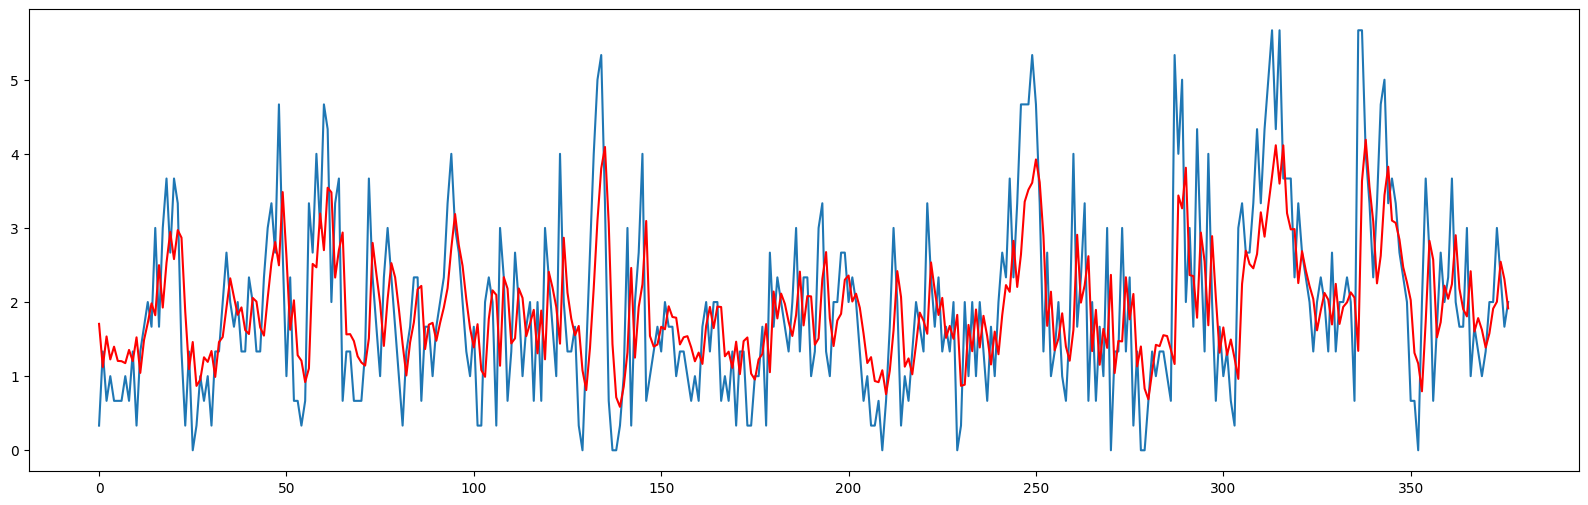

In [64]:
plt.figure(figsize=(20, 6))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

-----------------------------

In [87]:
features = ["Timestamp", "Bt-med", "Bt-min", "Bt-max", "Bx-max", "By-min", "Bz-med", "Bz-min", "Theta-med", "Theta-min", "Dens-med", "Dens-max", "Speed-max", "Kp"]
df1 = pd.read_csv('../Datasets/Merged_Dataset.csv')
df = df1[features]
df2 = np.hstack([df[col].values.reshape(-1, 1) for col in df.columns])

#### LSTM

In [105]:
dataset = list()
temp = []
for i in df.columns:
    t = df[i].values.reshape(-1, 1)
    dataset.append([item for sublist in t for item in sublist])
print(dataset)

[['01-01-2023 00:00', '01-01-2023 06:00', '01-01-2023 12:00', '01-01-2023 18:00', '02-01-2023 00:00', '02-01-2023 06:00', '02-01-2023 12:00', '02-01-2023 18:00', '03-01-2023 00:00', '03-01-2023 06:00', '03-01-2023 12:00', '03-01-2023 18:00', '04-01-2023 00:00', '04-01-2023 06:00', '04-01-2023 12:00', '04-01-2023 18:00', '05-01-2023 00:00', '05-01-2023 06:00', '05-01-2023 12:00', '05-01-2023 18:00', '06-01-2023 00:00', '06-01-2023 06:00', '06-01-2023 12:00', '06-01-2023 18:00', '07-01-2023 00:00', '07-01-2023 06:00', '07-01-2023 12:00', '07-01-2023 18:00', '08-01-2023 00:00', '08-01-2023 06:00', '08-01-2023 12:00', '08-01-2023 18:00', '09-01-2023 00:00', '09-01-2023 06:00', '09-01-2023 12:00', '09-01-2023 18:00', '10-01-2023 00:00', '10-01-2023 06:00', '10-01-2023 12:00', '10-01-2023 18:00', '11-01-2023 00:00', '11-01-2023 06:00', '11-01-2023 12:00', '11-01-2023 18:00', '12-01-2023 00:00', '12-01-2023 06:00', '12-01-2023 12:00', '12-01-2023 18:00', '13-01-2023 00:00', '13-01-2023 06:00'

In [106]:
import numpy as np

n_steps = 3

def split_sequences(sequences, n_steps): 
    X, y = list(), list() 
    for i in range(len(sequences)): 
        # find the end of this pattern 
        end_ix = i + n_steps 
        # check if we are beyond the dataset 
        if end_ix > len(sequences)-1: 
            break 
        # gather input and output parts of the pattern 
        seq_x, seq_y = sequences[i:end_ix], sequences[end_ix] 
        X.append(seq_x) 
        y.append(seq_y) 
    return np.array(X), np.array(y)

X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

(11, 3, 1108) (11, 1108)
